In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import pgeocode
import geopandas
from collections import defaultdict

In [2]:
df = pd.read_csv("autos.csv", encoding = "latin")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
df.describe(include="all")

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [5]:
df.drop(['dateCrawled', 'nrOfPictures', 'lastSeen'], axis=1, inplace=True)
df['postalCode'] = df['postalCode'].astype(str)

In [6]:
df['seller'].unique()

array(['privat', 'gewerblich'], dtype=object)

In [7]:
def convertseller(x):
    return ['private' if i=='privat' else 'commercial' for i in x]

df = df.assign(seller=convertseller(df['seller']))
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
0,Golf_3_1.6,private,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435
1,A5_Sportback_2.7_Tdi,private,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954
2,"Jeep_Grand_Cherokee_""Overland""",private,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480
3,GOLF_4_1_4__3TÜRER,private,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437


In [8]:
df['offerType'].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [9]:
df.iloc[df[df['offerType']!='Angebot'].index, 2] = 'looking to buy'
df.iloc[df[df['offerType']=='Angebot'].index, 2] = 'for sale'
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
0,Golf_3_1.6,private,for sale,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435
1,A5_Sportback_2.7_Tdi,private,for sale,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954
2,"Jeep_Grand_Cherokee_""Overland""",private,for sale,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480
3,GOLF_4_1_4__3TÜRER,private,for sale,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,for sale,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437


In [10]:
df['abtest'].unique()

array(['test', 'control'], dtype=object)

In [11]:
df['vehicleType'].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [12]:
def convertvehicletype(x):
    translate = dict(kleinwagen='compact sedan', cabrio='convertible', kombi='full-size sedan', andere='others')
    return translate[x] if x in translate.keys() else x

df['vehicleType'] = df['vehicleType'].apply(convertvehicletype)
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
0,Golf_3_1.6,private,for sale,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435
1,A5_Sportback_2.7_Tdi,private,for sale,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954
2,"Jeep_Grand_Cherokee_""Overland""",private,for sale,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480
3,GOLF_4_1_4__3TÜRER,private,for sale,1500,test,compact sedan,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,for sale,3600,test,compact sedan,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437


In [13]:
for i in ['gearbox','fuelType','notRepairedDamage']:
    print(df[i].unique())

['manuell' 'automatik' nan]
['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
[nan 'ja' 'nein']


In [14]:
df['gearbox'] = np.where(df['gearbox']=='manuell', 'manual', np.where(df['gearbox']=='automatik', 'automatic', df['gearbox']))
conditions = [df['fuelType']=='benzin', df['fuelType']=='lpg', df['fuelType']=='andere', df['fuelType']=='cng', df['fuelType']=='elektro']
translate = ['gasoline', 'liquidfied gas', 'others', 'natural gas', 'electric']
df['fuelType'] = np.select(conditions, translate, df['fuelType'])
mapping = {'ja':'yes', 'nein':'no'}
df['notRepairedDamage'] = df['notRepairedDamage'].map(lambda x: mapping[x] if not pd.isna(x) else x)
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
0,Golf_3_1.6,private,for sale,480,test,NaN,1993,manual,0,golf,150000,0,gasoline,volkswagen,NaN,2016-03-24 00:00:00,70435
1,A5_Sportback_2.7_Tdi,private,for sale,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,66954
2,"Jeep_Grand_Cherokee_""Overland""",private,for sale,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480
3,GOLF_4_1_4__3TÜRER,private,for sale,1500,test,compact sedan,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17 00:00:00,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,for sale,3600,test,compact sedan,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,60437


In [15]:
df['price'] = (df['price']*1.12).astype('int64')
df['mileage'] = (df['kilometer']*0.62137).astype('int64')
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,mileage
0,Golf_3_1.6,private,for sale,537,test,NaN,1993,manual,0,golf,150000,0,gasoline,volkswagen,NaN,2016-03-24 00:00:00,70435,93205
1,A5_Sportback_2.7_Tdi,private,for sale,20496,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,66954,77671
2,"Jeep_Grand_Cherokee_""Overland""",private,for sale,10976,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,77671
3,GOLF_4_1_4__3TÜRER,private,for sale,1680,test,compact sedan,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17 00:00:00,91074,93205
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,for sale,4032,test,compact sedan,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,60437,55923


In [16]:
df[df['price']==0].shape[0]

10778

In [17]:
df.drop(df.index[df['price']==0], axis=0, inplace=True)

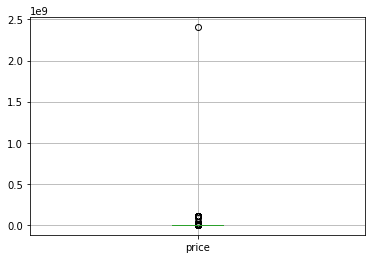

In [18]:
df.boxplot(column='price')

In [19]:
df.loc[df['price']>df['price'].quantile(0.95)]

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,mileage
56,BMW_435i_Sport_coupe,private,for sale,44352,test,coupe,2014,automatic,306,andere,30000,7,gasoline,bmw,no,2016-03-21 00:00:00,10435,18641
80,Mercedes_Benz_E_250_CDI_Mod.2011_Automatik_NAV...,private,for sale,22736,test,limousine,2010,automatic,204,e_klasse,80000,12,diesel,mercedes_benz,no,2016-03-11 00:00:00,51491,49709
98,BMW_318d_Aut.__Xenon__Navi__Sportsitze_FESTREIS!,private,for sale,26308,control,limousine,2013,automatic,143,3er,40000,6,diesel,bmw,no,2016-03-31 00:00:00,49356,24854
104,Hyundai_Genesis_Coupe_GT_3.8_V6_Automatik,private,for sale,25758,control,coupe,2012,automatic,303,andere,50000,4,gasoline,hyundai,no,2016-03-16 00:00:00,88167,31068
148,Mercedes_Benz_GLK_250_BlueTEC_4Matic_Standhzg_...,private,for sale,46928,control,suv,2014,automatic,204,glk,40000,9,diesel,mercedes_benz,no,2016-03-30 00:00:00,82131,24854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371435,BMW_525d_Sport_Aut.,private,for sale,24078,control,limousine,2011,automatic,204,5er,150000,2,diesel,bmw,no,2016-03-31 00:00:00,50668,93205
371477,BMW_525d_Touring_Sport_Aut.,private,for sale,26768,control,full-size sedan,2011,automatic,204,5er,150000,7,diesel,bmw,no,2016-03-07 00:00:00,85376,93205
371483,Mercedes_Benz_E_200_CDI_DPF_BlueEFFICIENCY_7G_...,private,for sale,22960,control,limousine,2012,automatic,136,e_klasse,60000,4,diesel,mercedes_benz,no,2016-03-07 00:00:00,77694,37282
371500,Volkswagen_Golf_1.4_TSI_BlueMotion_Technology_...,private,for sale,22848,test,limousine,2014,automatic,150,golf,30000,9,gasoline,volkswagen,no,2016-03-21 00:00:00,38470,18641


In [20]:
df.loc[df['price']>1000000]

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,mileage
14663,Tausch_moeglich_Polo_vw_n9,private,for sale,12444444,control,coupe,2003,manual,64,polo,150000,2,gasoline,volkswagen,NaN,2016-04-03 00:00:00,46535,93205
16889,Ford_Mondeo_Kombi_TÜV_abgelaufen,private,for sale,1120000,control,full-size sedan,1998,NaN,0,mondeo,150000,0,gasoline,ford,yes,2016-03-15 00:00:00,26607,93205
20143,Porsche_911R_Einer_von_911,private,for sale,1400000,test,coupe,2016,manual,500,911,5000,3,gasoline,porsche,no,2016-03-17 00:00:00,70435,3106
20746,Golf3_Schlachtfest,private,for sale,13827159,test,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-08 00:00:00,18516,93205
21467,Porsche_911_911R_1_of_20_ORIGINAL_R_nur_798KG!...,private,for sale,11199998,control,coupe,1967,manual,215,911,50000,10,gasoline,porsche,no,2016-03-19 00:00:00,70435,31068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363434,Vw_Passat_35i_1.8_schlachtfest,private,for sale,11200000,test,full-size sedan,1996,manual,90,NaN,150000,0,gasoline,volkswagen,yes,2016-03-23 00:00:00,36251,93205
364171,Ferrari_FXX,private,for sale,4356800,test,coupe,2006,NaN,799,NaN,5000,7,NaN,sonstige_autos,no,2016-04-04 00:00:00,60313,3106
366653,BMW_E36_Cabrio_tausch_gegen_ein_Opel_Insignia,private,for sale,111999998,control,convertible,1996,manual,192,3er,150000,0,NaN,bmw,NaN,2016-03-20 00:00:00,36251,93205
366861,Ferrari_FXX__unfallfrei__perfekter_Zustand,private,for sale,4362400,test,coupe,2006,NaN,799,NaN,5000,4,gasoline,sonstige_autos,no,2016-03-21 00:00:00,60323,3106


In [21]:
df.loc[df['price']>5000000]

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,mileage
14663,Tausch_moeglich_Polo_vw_n9,private,for sale,12444444,control,coupe,2003,manual,64,polo,150000,2,gasoline,volkswagen,NaN,2016-04-03 00:00:00,46535,93205
20746,Golf3_Schlachtfest,private,for sale,13827159,test,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-08 00:00:00,18516,93205
21467,Porsche_911_911R_1_of_20_ORIGINAL_R_nur_798KG!...,private,for sale,11199998,control,coupe,1967,manual,215,911,50000,10,gasoline,porsche,no,2016-03-19 00:00:00,70435,31068
39625,Tausche_volvo_v40_gegen_van,private,for sale,13827159,control,NaN,2018,manual,95,v40,150000,6,NaN,volvo,no,2016-03-08 00:00:00,14542,93205
54295,Mazda_5_2.0_CD_DPF_Exclusive,private,for sale,11200000,control,bus,2007,manual,143,5_reihe,150000,2,diesel,mazda,no,2016-03-08 00:00:00,83301,93205
54507,Tausch_DKW_F8_gegen_Lanz_Bulldog,private,for sale,12444444,test,others,1953,manual,20,NaN,150000,5,NaN,audi,no,2016-03-09 00:00:00,7774,93205
56973,tausche_ford_mondeo_mk3_ghia_gegen_anderes_auto,private,for sale,111999998,control,limousine,2002,manual,131,mondeo,150000,1,NaN,ford,NaN,2016-03-18 00:00:00,27574,93205
69747,Suche_Mercedes_Benz_r_klasse_cdi,private,for sale,111999998,control,bus,2006,NaN,0,andere,150000,0,diesel,mercedes_benz,NaN,2016-03-20 00:00:00,86916,93205
77520,Tausch_gegen_gleichwertiges,private,for sale,111999998,control,limousine,1999,automatic,224,s_klasse,150000,9,gasoline,mercedes_benz,NaN,2016-03-22 00:00:00,73525,93205
87799,Leasinguebernahme,private,for sale,30600888,control,limousine,2014,manual,163,c4,40000,2,diesel,citroen,NaN,2016-03-08 00:00:00,76532,24854


In [22]:
df.drop(df.loc[df['price']>5000000].index, axis=0, inplace=True)

In [23]:
subdf1 = np.log(df['price']).to_frame()

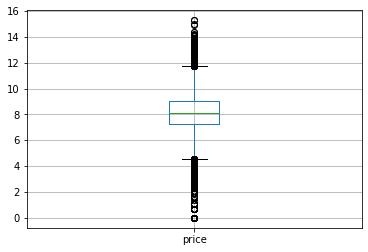

In [24]:
subdf1.boxplot()

In [25]:
df.loc[df['price']<df['price'].quantile(0.05)]

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,mileage
16,Polo_6n_1_4,private,for sale,336,test,NaN,2016,NaN,60,polo,150000,0,gasoline,volkswagen,NaN,2016-04-01 00:00:00,38871,93205
32,Golf_3_....._1.4,private,for sale,274,test,limousine,1994,NaN,0,golf,150000,2,gasoline,volkswagen,no,2016-03-15 00:00:00,44145,93205
60,TAUSCHE_BMW_E38_740i_g._SUV_/_GELÄNDEWAGEN_LES...,private,for sale,1,control,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,NaN,2016-03-29 00:00:00,53721,93205
61,Bmw_316i_compact.____200,private,for sale,224,test,coupe,1995,manual,102,3er,150000,4,gasoline,bmw,NaN,2016-03-26 00:00:00,23560,93205
81,Opel_Astra_F_Cabrio,private,for sale,168,control,NaN,2016,manual,75,astra,150000,3,gasoline,opel,yes,2016-03-17 00:00:00,78315,93205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371377,VW_Polo_86c_Fox,private,for sale,224,test,compact sedan,1991,manual,45,polo,150000,1,gasoline,volkswagen,yes,2016-03-26 00:00:00,27798,93205
371378,Polo_6N_75_PS_mit_super_USB/CD_Player/Radio,private,for sale,268,control,compact sedan,1995,manual,75,polo,150000,7,NaN,volkswagen,NaN,2016-03-12 00:00:00,59065,93205
371427,Opel_Astra_FCC,private,for sale,168,test,compact sedan,1993,manual,55,astra,150000,3,gasoline,opel,yes,2016-03-16 00:00:00,66424,93205
371464,Seat_Arosa_/_1999_/_Tuev_06.2016,private,for sale,110,test,compact sedan,1999,manual,60,arosa,150000,1,gasoline,seat,yes,2016-03-09 00:00:00,91301,93205


In [26]:
df.loc[df['price']<100]

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,mileage
60,TAUSCHE_BMW_E38_740i_g._SUV_/_GELÄNDEWAGEN_LES...,private,for sale,1,control,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,NaN,2016-03-29 00:00:00,53721,93205
91,MERCEDES_BENZ_W124_250D_83KW_/_113PS___SCHLACH...,private,for sale,1,control,limousine,1995,manual,113,e_klasse,150000,4,diesel,mercedes_benz,no,2016-03-28 00:00:00,40589,93205
279,Tausche_Youngtimer_Audi_80_mit_knapp_62000_km,private,for sale,1,test,limousine,1990,manual,90,80,70000,6,gasoline,audi,no,2016-03-11 00:00:00,55122,43495
422,Schlachte_Golf_4._89.000_KM._Blau_1.4_16V,private,for sale,1,control,NaN,2000,NaN,75,golf,90000,3,gasoline,volkswagen,NaN,2016-03-29 00:00:00,78588,55923
577,Trabant_zu_verkaufen,private,for sale,56,test,NaN,1985,NaN,0,NaN,150000,11,NaN,trabant,NaN,2016-03-21 00:00:00,69120,93205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370699,Bmw_f10_f11_orginale_nieren,private,for sale,44,test,full-size sedan,2011,NaN,0,5er,80000,0,NaN,bmw,NaN,2016-03-17 00:00:00,29348,49709
370710,Alles_wird_verkauft!!!!!Auch_als_packet,private,for sale,1,control,NaN,2000,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN,2016-03-31 00:00:00,52525,6213
370810,Tausche_gegen_Chrysler_van_oder?,private,for sale,1,control,bus,1999,manual,0,espace,150000,0,gasoline,renault,NaN,2016-03-07 00:00:00,57439,93205
370858,TAUSCHE_BMW_320i_e46_limo,private,for sale,1,test,NaN,2000,NaN,0,NaN,150000,0,NaN,bmw,NaN,2016-03-20 00:00:00,42329,93205


In [27]:
df.drop(df.loc[df['price']<100].index, axis=0, inplace=True)

In [28]:
df['model'].isna().sum()

17824

In [29]:
df.loc[df['model'].isna(),['name', 'brand', 'model']]

,name,brand,model
1,A5_Sportback_2.7_Tdi,audi,NaN
83,Bastler_Fahrzeug_mit_Rest_Tuev,fiat,NaN
139,Audi_80_5_Zylinder_b4_liebhaberfahrzeug,audi,NaN
156,POLO_1.2_KILIMA_WIE_NEU,volkswagen,NaN
165,is_ales_ok,renault,NaN
...,...,...,...
371399,Fiat_Stilo_Abarth_2.4_5zylinder_Seelespeed,fiat,NaN
371476,ALPINA_D3_Touring,sonstige_autos,NaN
371495,Opel_Tigra,opel,NaN
371509,LT_35_DIESEL_Gruene_Plakette....letzte_Gelegen...,volkswagen,NaN


In [30]:
df['brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki',
       'lancia', 'porsche', 'sonstige_autos', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'chrysler', 'jaguar', 'daewoo', 'rover',
       'saab', 'land_rover', 'trabant', 'lada'], dtype=object)

In [31]:
brands = df['brand'].unique().tolist()
models = defaultdict(list)

for brand in brands:
    collection = df.loc[df['brand']==brand, 'model'].dropna().unique().tolist()
    models[brand] = collection
    
subdf2 = df.loc[df['model'].isna(),['name', 'brand']]
subdf2['model'] = subdf2.apply(lambda x: ''.join(set(x[0].lower().split('_')).intersection(set(models[x[1]]))) 
                        if len(set(x[0].lower().split('_')).intersection(set(models[x[1]])))==1 else 'andere', axis=1)
df.loc[subdf2.index, ['model']] = subdf2['model']

subdf2

,name,brand,model
1,A5_Sportback_2.7_Tdi,audi,a5
83,Bastler_Fahrzeug_mit_Rest_Tuev,fiat,andere
139,Audi_80_5_Zylinder_b4_liebhaberfahrzeug,audi,80
156,POLO_1.2_KILIMA_WIE_NEU,volkswagen,polo
165,is_ales_ok,renault,andere
...,...,...,...
371399,Fiat_Stilo_Abarth_2.4_5zylinder_Seelespeed,fiat,stilo
371476,ALPINA_D3_Touring,sonstige_autos,andere
371495,Opel_Tigra,opel,tigra
371509,LT_35_DIESEL_Gruene_Plakette....letzte_Gelegen...,volkswagen,andere


In [31]:
brands = df['brand'].unique().tolist() # create an unique list of manufacturers
models = dict() # use as a lookup reference for manufacturers and the corresponding models

for brand in brands:
    collection = df.loc[df['brand']==brand, 'model'].dropna().unique().tolist() # retrieve unique list of models for each brand
    models[brand] = collection # create an entry for the lookup dictionary

subdf2 = df.loc[df['model'].isna(),['name', 'brand']] # filter dataFrame to only models with missing data

def findmodel(x):
    for w in x[0].lower().split('_'): # convert the string to lowercase and split on underscore
        if w in models[x[1]]: # check and see if any word in the string is in the lookup dictionary
            return w
    return 'andere'

subdf2['model'] = subdf2.apply(findmodel, axis=1)
df.loc[subdf2.index, ['model']] = subdf2['model'] # update changes to the original dataFrame
subdf2

,name,brand,model
1,A5_Sportback_2.7_Tdi,audi,a5
83,Bastler_Fahrzeug_mit_Rest_Tuev,fiat,andere
139,Audi_80_5_Zylinder_b4_liebhaberfahrzeug,audi,80
156,POLO_1.2_KILIMA_WIE_NEU,volkswagen,polo
165,is_ales_ok,renault,andere
...,...,...,...
371399,Fiat_Stilo_Abarth_2.4_5zylinder_Seelespeed,fiat,stilo
371476,ALPINA_D3_Touring,sonstige_autos,andere
371495,Opel_Tigra,opel,tigra
371509,LT_35_DIESEL_Gruene_Plakette....letzte_Gelegen...,volkswagen,andere


In [32]:
subdf2[(subdf2['model']=='andere') & (subdf2['brand']=='bmw')]

,name,brand,model
191,BMW_530xd_e60_EZ10/2008,bmw,andere
320,Biete_BMW_318_i_Kombi_auch_Tausch,bmw,andere
658,BMW_E_46_Cabrio__Black_Saphir_Metallic__Facelift,bmw,andere
907,BMW_318ti_in_Weiss,bmw,andere
1504,BMW_323i_TÜV_NEU,bmw,andere
...,...,...,...
370085,Top_BMW_TÜV_12_2017_Top,bmw,andere
370177,BMW_E36_325i_AC_Schnitzer_Paket_Limo__Ohne_Vanos_,bmw,andere
370209,BMW_520i_zu_verkaufen,bmw,andere
370212,BMW_e61_525i,bmw,andere


In [33]:
models['bmw']

['3er',
 '5er',
 '1er',
 'andere',
 '7er',
 'z_reihe',
 '6er',
 'x_reihe',
 'm_reihe',
 'i3']

In [34]:
regexp = [r'_(1\d\d[a-z]*)_', r'_(3\d\d[a-z]*)_', r'_(5\d\d[a-z]*)_', r'_(6\d\d[a-z]*)_', r'_(7\d\d[a-z]*)_']
modseries = ['1er', '3er', '5er', '6er', '7er'] # corresponding label for the regular expressions above

for rexp, mser in zip(regexp, modseries): # zip the two lists and iterate through the regular expressions and models
    indices = subdf2.loc[(subdf2['model']=='andere') & (subdf2['brand']=='bmw'), 'name'].str.lower().str.extract(rexp).dropna().index # get position of matches
    df.loc[indices, 'model'], subdf2.loc[indices, 'model'] = mser, mser # update matches with model labels
    
(subdf2['model']=='andere').sum()

9226

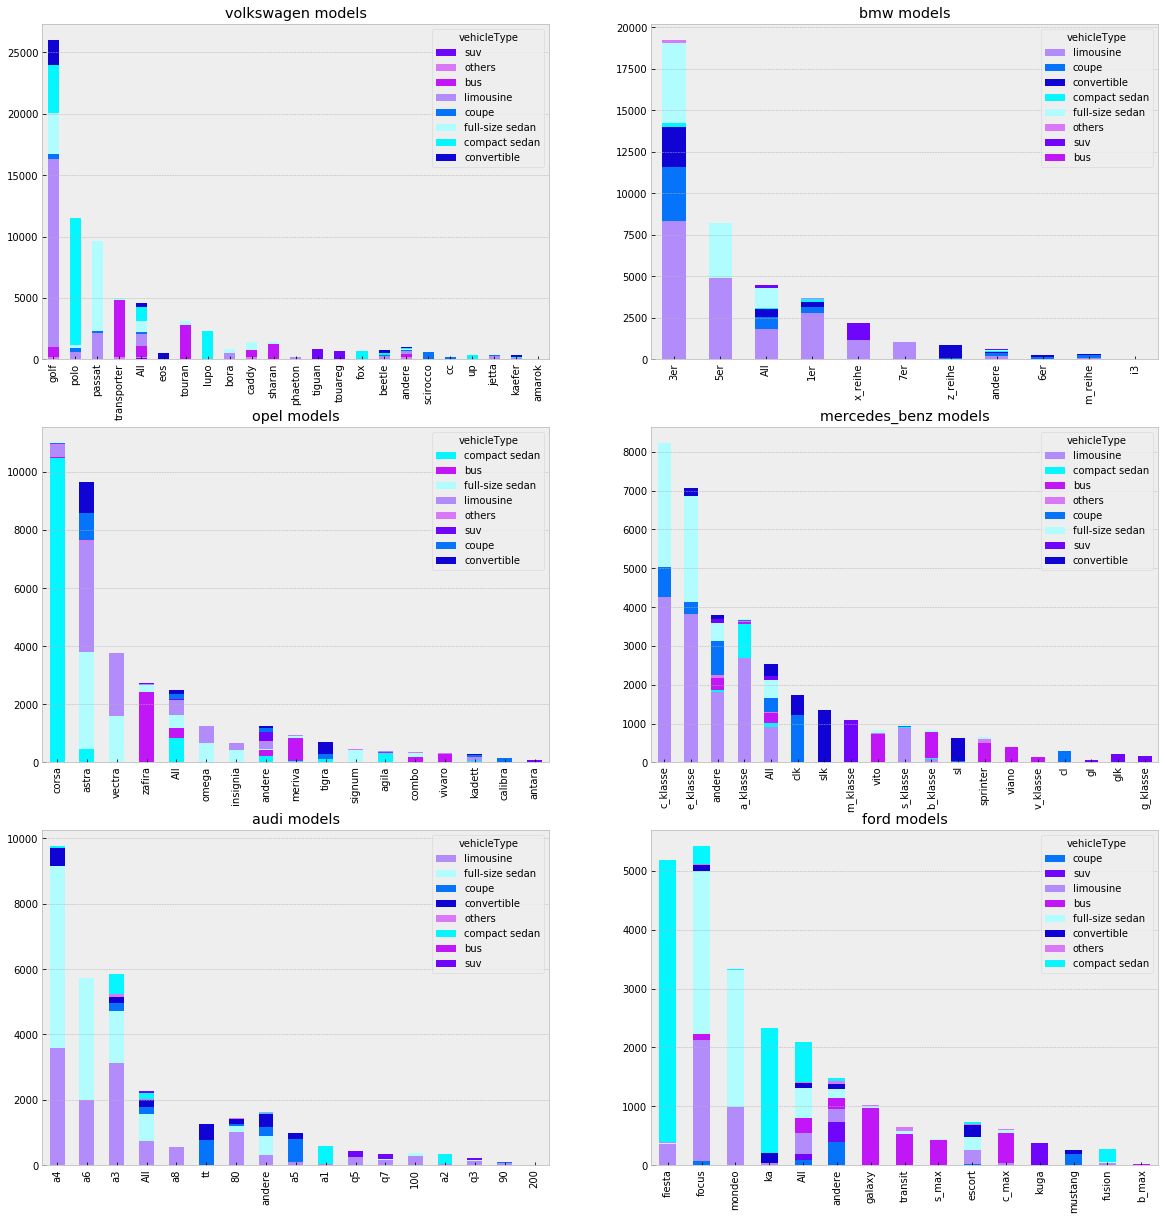

In [35]:
%matplotlib inline

matplotlib.style.use('bmh')

fig, axes = plt.subplots(3, 2, figsize=(20, 21))
colors = {'convertible':'#0f04d4', # dictionary to associate colors with vehicle types
          'coupe':'#0573fa',
          'compact sedan':'#05f6ff',
          'full-size sedan':'#b0fcff',
          'suv':'#7005fc',
          'limousine':'#b18cfa',
          'bus':'#c116f5',
          'others':'#da79f7'}

brand = df['brand'].value_counts().index[:6].tolist() # list of the top 6 car manufacturers
gbdf = df.groupby(['brand', 'model']).agg({'vehicleType':'value_counts'}).rename(columns={'vehicleType':'total'}).reset_index() # create grouped data for chart
gbdf.drop(gbdf.loc[~gbdf['brand'].isin(brand)].index, inplace=True)

for ax, b in zip(axes.flatten(), brand):
    vehicle_type = gbdf.loc[gbdf['brand']==b, 'vehicleType'].drop_duplicates() # get label for the different vehicle types 
    pivotdf = gbdf.loc[gbdf['brand']==b].pivot_table(index='model', columns='vehicleType', values='total', margins=True) \
    .sort_values('All', ascending=False) # sorted pivot grouped data format is needed to plot a bar chart with descending bars 
    pivotdf.loc[:, vehicle_type].plot.bar(stacked=True, ax=ax, color=[colors[vt] for vt in vehicle_type])
    ax.set_title(f'{b} models')
    ax.set_xlabel(None)
    ax.xaxis.grid(False)
      
plt.show()

In [36]:
df['vehicleType'] = df.groupby(['brand', 'model'])['vehicleType'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358321 entries, 0 to 371527
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 358321 non-null  object
 1   seller               358321 non-null  object
 2   offerType            358321 non-null  object
 3   price                358321 non-null  int64 
 4   abtest               358321 non-null  object
 5   vehicleType          358321 non-null  object
 6   yearOfRegistration   358321 non-null  int64 
 7   gearbox              341593 non-null  object
 8   powerPS              358321 non-null  int64 
 9   model                358321 non-null  object
 10  kilometer            358321 non-null  int64 
 11  monthOfRegistration  358321 non-null  int64 
 12  fuelType             329457 non-null  object
 13  brand                358321 non-null  object
 14  notRepairedDamage    292998 non-null  object
 15  dateCreated          358321 non-nu

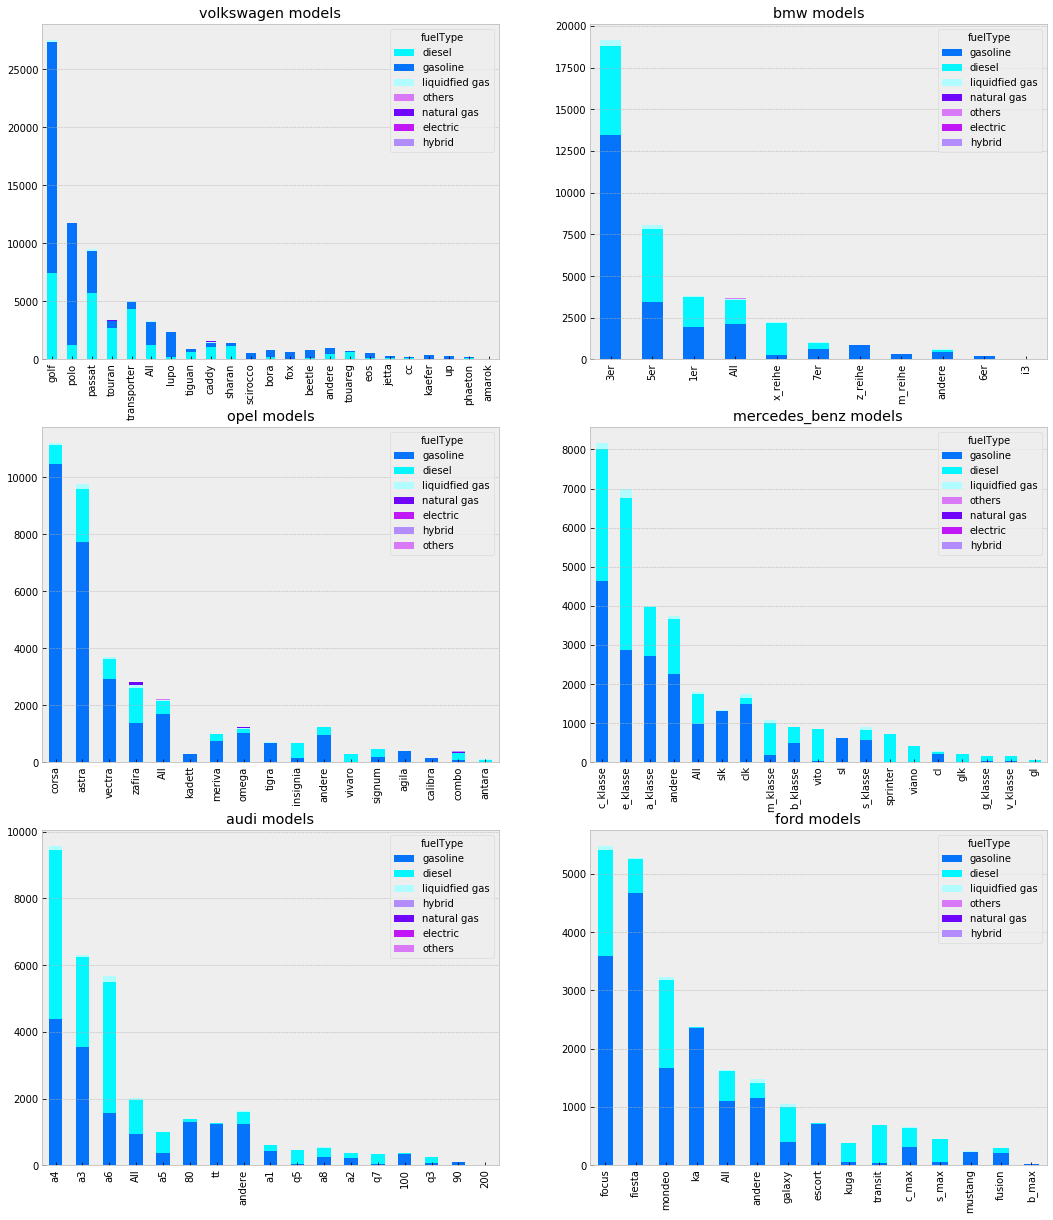

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(18, 21))
colors = {'gasoline':'#0573fa',
          'diesel':'#05f6ff',
          'liquidfied gas':'#b0fcff',
          'natural gas':'#7005fc',
          'hybrid':'#b18cfa',
          'electric':'#c116f5',
          'others':'#da79f7'}

brand = df['brand'].value_counts().index[:6].tolist()
gbdf = df.groupby(['brand', 'model']).agg({'fuelType':'value_counts'}).rename(columns={'fuelType':'total'}).reset_index()
gbdf.drop(gbdf.loc[~gbdf['brand'].isin(brand)].index, inplace=True)

for ax, b in zip(axes.flatten(), brand):
    fuel_type = gbdf.loc[gbdf['brand']==b, 'fuelType'].drop_duplicates()
    pivotdf = gbdf.loc[gbdf['brand']==b].pivot_table(index='model', columns='fuelType', values='total', margins=True) \
    .sort_values('All', ascending=False)
    pivotdf.loc[:, fuel_type].plot.bar(stacked=True, ax=ax, color=[colors[ft] for ft in fuel_type])
    ax.set_title(f'{b} models')
    ax.set_xlabel(None)
    ax.xaxis.grid(False)
    
plt.show()

In [38]:
df.loc[df['fuelType'].isna(), 'fuelType'] = df.groupby(['brand', 'model'])['fuelType'] \
.transform(lambda x: pd.Series.mode(x)[0]).loc[df['fuelType'].isna()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358321 entries, 0 to 371527
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 358321 non-null  object
 1   seller               358321 non-null  object
 2   offerType            358321 non-null  object
 3   price                358321 non-null  int64 
 4   abtest               358321 non-null  object
 5   vehicleType          358321 non-null  object
 6   yearOfRegistration   358321 non-null  int64 
 7   gearbox              341593 non-null  object
 8   powerPS              358321 non-null  int64 
 9   model                358321 non-null  object
 10  kilometer            358321 non-null  int64 
 11  monthOfRegistration  358321 non-null  int64 
 12  fuelType             358321 non-null  object
 13  brand                358321 non-null  object
 14  notRepairedDamage    292998 non-null  object
 15  dateCreated          358321 non-nu

In [39]:
df[['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']] = df[['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358321 entries, 0 to 371527
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 358321 non-null  object  
 1   seller               358321 non-null  category
 2   offerType            358321 non-null  category
 3   price                358321 non-null  int64   
 4   abtest               358321 non-null  category
 5   vehicleType          358321 non-null  category
 6   yearOfRegistration   358321 non-null  int64   
 7   gearbox              341593 non-null  category
 8   powerPS              358321 non-null  int64   
 9   model                358321 non-null  category
 10  kilometer            358321 non-null  int64   
 11  monthOfRegistration  358321 non-null  int64   
 12  fuelType             358321 non-null  category
 13  brand                358321 non-null  category
 14  notRepairedDamage    292998 non-null  category
 15  

In [40]:
df[(df['yearOfRegistration']>2016) | (df['yearOfRegistration']<1900)]['yearOfRegistration'].value_counts()

2017    9937
2018    3798
1000      23
2019      17
5000      15
9999      15
6000       6
1234       4
9000       4
1800       4
7000       4
3000       4
4000       3
1500       3
2500       2
1300       2
1111       2
8888       2
5555       2
5911       2
1600       2
4500       2
2200       1
1400       1
4800       1
3800       1
2800       1
5600       1
1001       1
3200       1
7500       1
2290       1
1602       1
4100       1
1039       1
7100       1
2222       1
5900       1
9450       1
5300       1
3700       1
7777       1
2900       1
8200       1
7800       1
1255       1
6200       1
2066       1
8500       1
Name: yearOfRegistration, dtype: int64

In [41]:
df[(df['yearOfRegistration']==2017) | (df['yearOfRegistration']==2018)]

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,mileage
22,Opel_Meriva_1.Hand_TÜV_3.2018,private,for sale,3248,test,bus,2018,manual,90,meriva,150000,5,gasoline,opel,no,2016-03-23 00:00:00,49716,93205
26,Citroen_C4_Grand_Picasso.,private,for sale,6221,control,limousine,2017,manual,125,c4,125000,4,diesel,citroen,no,2016-03-10 00:00:00,31139,77671
48,VW_Golf_6___Klima___Alu___Scheckheft_!!!,private,for sale,8680,control,limousine,2017,manual,80,golf,100000,1,gasoline,volkswagen,NaN,2016-03-25 00:00:00,48499,62137
51,Fiat_punto_5_tuerer__6_gang,private,for sale,2240,control,compact sedan,2017,manual,90,punto,150000,11,diesel,fiat,yes,2016-03-07 00:00:00,66115,93205
58,Seat_inca_1.9SDI___LKW_Zulassung___TÜV_NEU,private,for sale,2686,test,compact sedan,2018,manual,64,andere,125000,3,gasoline,seat,no,2016-03-10 00:00:00,33397,77671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371258,Ford_Transit_280_K_TDCI_LKW_TREND._Scheckheft,private,for sale,4032,test,bus,2017,manual,86,transit,150000,5,diesel,ford,NaN,2016-03-11 00:00:00,32339,93205
371286,Audi_a4__zu_verkaufen,private,for sale,1120,control,full-size sedan,2017,manual,101,a4,150000,9,diesel,audi,NaN,2016-03-29 00:00:00,38315,93205
371354,FORD_Fiesta__2.Hand__TÜV_neu,private,for sale,2396,test,compact sedan,2018,manual,80,fiesta,150000,6,gasoline,ford,no,2016-03-17 00:00:00,44866,93205
371407,Opel_Corsa_C,private,for sale,1400,test,compact sedan,2018,NaN,0,corsa,150000,0,gasoline,opel,NaN,2016-03-25 00:00:00,45527,93205


In [42]:
df.drop(df[(df['yearOfRegistration']>2016) | (df['yearOfRegistration']<1900)].index, axis=0, inplace=True)

In [43]:
df[(df['yearOfRegistration']==2016) & (df['monthOfRegistration']>3)]

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,mileage
31,Renault_clio_1.2_TÜV_07/2016,private,for sale,1006,control,compact sedan,2016,manual,60,clio,150000,6,gasoline,renault,NaN,2016-03-29 00:00:00,37075,93205
35,VW_Golf_3,private,for sale,392,test,limousine,2016,manual,75,golf,150000,4,gasoline,volkswagen,no,2016-03-08 00:00:00,19386,93205
206,Nissan_Almera,private,for sale,2238,test,limousine,2016,manual,110,almera,150000,9,diesel,nissan,NaN,2016-04-03 00:00:00,10997,93205
306,Honda_jazz_1.4___5trg__mod_2006___klimatron___...,private,for sale,2676,test,compact sedan,2016,NaN,83,jazz,150000,12,gasoline,honda,no,2016-03-10 00:00:00,78713,93205
423,Volkswagen_Fox_zu_verkaufen._Top_Zustand,private,for sale,5040,control,compact sedan,2016,NaN,0,fox,60000,10,gasoline,volkswagen,NaN,2016-03-08 00:00:00,41466,37282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371252,Verkaufe_Golf_3___1_4_L__60_PS,private,for sale,442,control,limousine,2016,manual,60,golf,150000,12,gasoline,volkswagen,NaN,2016-03-09 00:00:00,25575,93205
371261,Opel_Astra_167500km_guter_Zustand_zu_verkaufen.,private,for sale,334,test,limousine,2016,manual,60,astra,150000,4,gasoline,opel,yes,2016-03-07 00:00:00,49326,93205
371316,colt_Mitsubishi,private,for sale,3360,control,limousine,2016,manual,0,colt,150000,8,diesel,mitsubishi,no,2016-03-29 00:00:00,45472,93205
371349,Mercedes_Benz_CLK_200_Kompressor_6_Gang,private,for sale,1512,test,coupe,2016,manual,0,clk,150000,8,gasoline,mercedes_benz,yes,2016-03-10 00:00:00,26427,93205


In [44]:
df[(df['yearOfRegistration']==2016) & (df['monthOfRegistration']<=3)]

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,mileage
16,Polo_6n_1_4,private,for sale,336,test,compact sedan,2016,NaN,60,polo,150000,0,gasoline,volkswagen,NaN,2016-04-01 00:00:00,38871,93205
37,Renault_Kangoo_1.9_Diesel,private,for sale,1680,test,bus,2016,NaN,0,kangoo,150000,1,diesel,renault,no,2016-03-28 00:00:00,46483,93205
52,Verkaufe_meinen_kleinen_wegen_neu_Anschaffung,private,for sale,1568,control,compact sedan,2016,manual,55,andere,5000,1,gasoline,hyundai,NaN,2016-04-04 00:00:00,34454,3106
81,Opel_Astra_F_Cabrio,private,for sale,168,control,limousine,2016,manual,75,astra,150000,3,gasoline,opel,yes,2016-03-17 00:00:00,78315,93205
186,Skoda_Fabian_Automatik._Kombi_Benziner,private,for sale,3360,control,compact sedan,2016,automatic,75,fabia,150000,0,gasoline,skoda,NaN,2016-03-21 00:00:00,24782,93205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370781,Audi_a3_1_8_TÜV_alcantara,private,for sale,1118,control,limousine,2016,NaN,125,a3,150000,0,gasoline,audi,NaN,2016-03-12 00:00:00,34311,93205
370962,Hallo_das_BMW_316_ist_tip_Top_sehr_gute_Zustan...,private,for sale,392,control,limousine,2016,manual,0,3er,20000,3,gasoline,bmw,NaN,2016-03-15 00:00:00,10315,12427
371245,Opel_Vectra_B_CC_2_5l_mit_Zylinderkopfdichtung...,private,for sale,672,control,limousine,2016,manual,170,vectra,150000,0,gasoline,opel,yes,2016-03-12 00:00:00,67475,93205
371255,Land_Rover_Defender_110_DPF_SW_Heritage_SONDER...,private,for sale,78288,test,suv,2016,manual,122,defender,5000,3,diesel,land_rover,no,2016-03-12 00:00:00,37120,3106


In [45]:
df.drop(df.index[df['yearOfRegistration']==2016], axis=0, inplace=True)

In [46]:
print(df['monthOfRegistration'].value_counts())

3     33619
6     30592
4     28553
5     28237
7     26872
0     26142
10    25384
11    23741
12    23475
9     23361
1     22691
8     21901
2     20761
Name: monthOfRegistration, dtype: int64


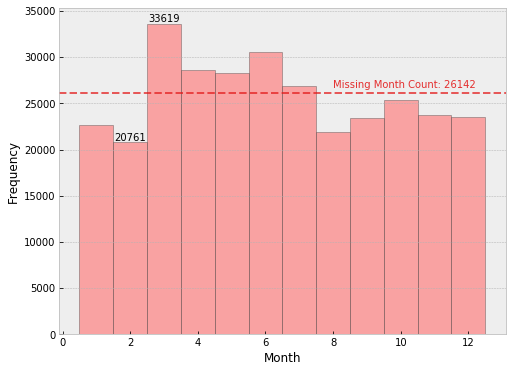

In [47]:
plt.figure(figsize=(8, 6))
# plot histogram without month 0 (missing value)
df.drop(df[df['monthOfRegistration']==0].index)['monthOfRegistration'].plot.hist(bins=(np.arange(1,14)-0.5), color='#ff8282', edgecolor='#363636', alpha=0.7)
plt.gca().xaxis.grid(False)
plt.gca().set_xlabel('Month')

rects = plt.gca().patches

mvcount = np.bincount(df['monthOfRegistration'])[0]
labels = np.bincount(df['monthOfRegistration'])[1:] #exclude month 0 (missing value) for the tally
labels = [m if (m==np.amax(labels)) | (m==np.amin(labels)) else None for m in labels] # list for annotating the max and min month

plt.axhline(mvcount, alpha=0.7, color='#e31919', linestyle='--')
plt.text(x=8, y=mvcount+500, s=f'Missing Month Count: {mvcount}', alpha=0.9, color='#e31919')

for rect, label in zip(rects, labels):
    height = rect.get_height() # retrieve location of the top of the bar position
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom') # add annotation

In [48]:
draw = df.drop(df[df['monthOfRegistration']==0].index, axis=0).groupby('yearOfRegistration')['monthOfRegistration'] # grouped data used to draw samples from
# using mask method on isolating missing months, lookup the registration year of missing month to create a sample set to pick a random month
df['monthOfRegistration'] = df['monthOfRegistration'].mask(df['monthOfRegistration']==0, df['yearOfRegistration']
                            .apply(lambda x: np.random.choice(draw.get_group(x).tolist(), 1)[0]), axis=0)

print(df['monthOfRegistration'].value_counts())

3     36409
6     33256
4     30940
5     30590
7     29218
10    27600
11    25573
12    25433
9     25293
1     24721
8     23773
2     22523
Name: monthOfRegistration, dtype: int64


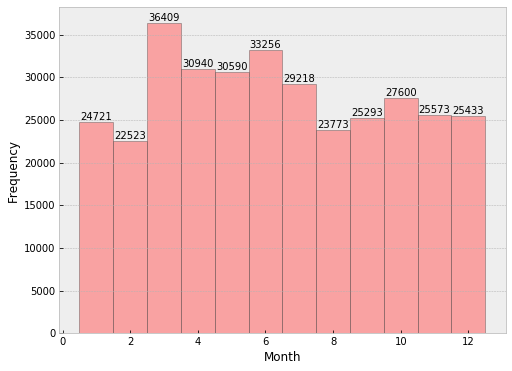

In [49]:
plt.figure(figsize=(8, 6))

df['monthOfRegistration'].plot.hist(bins=(np.arange(1,14)-0.5), color='#ff8282', edgecolor='#363636', alpha=0.7)
plt.gca().xaxis.grid(False)
plt.gca().set_xlabel('Month')

rects = plt.gca().patches

labels = np.bincount(df['monthOfRegistration'])[1:]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width()/2, height+5, label, ha='center', va='bottom')

In [45]:
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['dateOfRegistration'] = pd.to_datetime(df['yearOfRegistration'].astype(str) + '/' + df['monthOfRegistration'].astype(str) + '/01')
df['registrationPeriod'] = ((df['dateCreated'] - df['dateOfRegistration'])/np.timedelta64(1,'Y')).astype(int)
df['registrationPeriod']

0         22
1          4
2         11
3         14
4          7
          ..
371523    11
371524    16
371525    20
371526    13
371527     2
Name: registrationPeriod, Length: 335329, dtype: int64

In [46]:
from collections import Counter
dseries = df.loc[df['brand']=='sonstige_autos', 'name']
Counter(dseries.apply(lambda x: x.lower().split('_')).sum()).most_common(100)

[('', 1126),
 ('dodge', 408),
 ('mg', 207),
 ('andere', 192),
 ('mit', 187),
 ('suche', 181),
 ('ram', 155),
 ('auto', 151),
 ('lexus', 134),
 ('cadillac', 129),
 ('v8', 122),
 ('wartburg', 112),
 ('corvette', 108),
 ('oldtimer', 104),
 ('pontiac', 96),
 ('tüv', 92),
 ('iveco', 86),
 ('triumph', 82),
 ('abarth', 80),
 ('cabrio', 75),
 ('automatik', 74),
 ('h', 72),
 ('4x4', 69),
 ('ferrari', 69),
 ('2.0', 69),
 ('1500', 65),
 ('lpg', 65),
 ('4', 65),
 ('maserati', 64),
 ('3', 62),
 ('2', 62),
 ('s', 61),
 ('sport', 61),
 ('is', 58),
 ('ssangyong', 58),
 ('/', 57),
 ('ein', 56),
 ('crd', 56),
 ('coupe', 55),
 ('mopedauto', 54),
 ('1', 53),
 ('caliber', 53),
 ('ligier', 53),
 ('5', 52),
 ('353', 52),
 ('tuev', 52),
 ('lotus', 51),
 ('diesel', 51),
 ('mgf', 49),
 ('sxt', 48),
 ('zulassung', 48),
 ('aixam', 48),
 ('top', 47),
 ('bis', 47),
 ('firebird', 47),
 ('barkas', 44),
 ('neu', 44),
 ('v6', 44),
 ('und', 43),
 ('7', 43),
 ('microcar', 42),
 ('alpina', 42),
 ('luxury', 41),
 ('line', 

In [47]:
dseries[dseries.str.lower().apply(lambda x: 'lexus' in x.lower())].str.lower().str.extract(r'lexus_{1,2}([a-z0-9]+)_?')[0].unique()

array(['gs', 'ls', 'is', 'rx', 'ct', 'sc430', 'lexus', 'ct200h', '400',
       'sc', 'is250', 'is200', 'sc400'], dtype=object)

In [48]:
models = {'dodge': ['ram',  'challenger', 'charger', 'journey', 'dart', 'nitro', 'coronet', 'caliber', 'avenger', 'lancer', 'dakota', 'durango', 'caravan', 'magnum', 'viper'],
          'lexus': ['is', 'gs', 'ls', 'rx', 'ct', 'sc'],
          'cadillac': ['deville', 'sts', 'eldorado', 'seville', 'escalade', 'cts', 'srx', 'xlr', 'bls', 'fleetwood'],
          'corvette': ['z06', 'c6', 'c4', 'c2', 'c5', 'c3', 'c1', '1a', 'c7', 'zr'],
          'wartburg': ['353', '311', '313', 'ddr'],
          'iveco': ['daily', 'massif', '35', 'magirus', '75', 'turbodaily', '50', '45c11', 'ducato', 'maxi', '29', '7', '35l14', 'ml', '35e', 'sprinter'],
          'triumph': ['tr7', 'spitfire', 'tr3', 'gt6', 'austin', 'tr6', 'tr5', 'herald', 'moss', 'tr4a', 'gt', 'spartan', 'tr3a', 'stag', 'tr4'],
          'abarth': ['500', '595c', '595', '500c', '600', 'grande', 'supersport', 'punto', 'ot', 'turbo', 'seicento', 'cabrio'],
          'ferrari': ['california', '308', '360', 'mondial', '458', 'f355', '348', 'f430', 'testarossa', '246', '456', 'ff', '512', '206', 'formel', 'f40', '512tr', 'dino', 'fxx'],
          'maserati': ['4200', 'quattroporte', 'granturismo', 'gransport', 'mc12', 'spyder', 'biturbo', 'ghibli', 'indy', '222', '3200', 'gt', 'grancabrio'],
          'ssangyong': ['tivoli', 'musso', 'kyron', 'rexton', 'korando', 'actyon', 'rodius'],
          'ligier': ['optima', 'andere', 'ixo', 'js', 'nova', 'ambra', 'js30', 'x', 'nova500', 'js50l'],
          'lotus': ['elise', 'super', 'esprit', 'evora', 'elan', 'exige', 'excel'],
          'mgf': ['75', 'roadster', 'vvc', 'brooklands', 'rhd', 'bj'],
          'aixam': ['mega', '400', 'crossover', 'city', 'scouty', '500', 'crossline', 'a741'],
          'barkas': ['b1000', 'pritsche', 'framo'],
          'microcar': ['mc1', 'virgo', 'mc2', 'abaca', 'mgo', 'dci'],
          'buick': ['electra', 'riviera', 'skylark', 'wildcat', 'lesabre', 'park', 'reatta', 'roadmaster', 'century', 'regal', 'special'],
          'piaggio': ['ape', 'porter', 'tl5t', '50', 'vespa'],
          'oldsmobile': ['cutlass', 'toronado', '442', 'super', 'vista', 'custom', '98', 'delta', 'dynamic'],
          'lincoln': ['continental', 'navigator', 'town', 'mercury', 'mark', 'mkx']}


subdf3 = df.loc[df['brand']=='sonstige_autos', ['name']].copy()
subdf3['brand'] = subdf3['name']

for k in models.keys():
    subdf3['brand'] = np.where(subdf3['brand'].str.lower().str.contains(k), k, subdf3['brand'])
subdf3.loc[subdf3[subdf3['brand']==subdf3['name']].index, 'brand'] = 'sonstige_autos'

brands = np.array(subdf3['brand'])
names = np.array(subdf3['name'].str.lower())
updatedmodels = []

for n, b in zip(names, brands):
    if b!='sonstige_autos':
        for m in models[b]:
            if m in n:
                updatedmodels.append(m)
                break
        else:
            updatedmodels.append('andere')
    else:
        updatedmodels.append('andere')

subdf3['model'] = updatedmodels
subdf3

,name,brand,model
318,Tauache_90ccm_roller_gegen_auto,sonstige_autos,andere
376,Corvette_Z06,corvette,z06
446,Microcar_MC1,microcar,mc1
678,Oldsmobile_Cutlass,oldsmobile,cutlass
690,Dodge_RAM_1500_SLT_5_9l_V8_4X4_Benzin_/_Gas,dodge,ram
...,...,...,...
371203,Abarth_Grande_Punto,abarth,grande
371214,Oldsmobile_Dynamic_88_convertible_1960_Cabrio,oldsmobile,dynamic
371216,Barkas__B1000__Scheunenfund__Lieferwagen__4_Takt,barkas,b1000
371476,ALPINA_D3_Touring,sonstige_autos,andere


In [49]:
models = {'dodge': ['ram',  'challenger', 'charger', 'journey', 'dart', 'nitro', 'coronet', 'caliber', 'avenger', 'lancer', 'dakota', 'durango', 'caravan', 'magnum', 'viper'],
          'lexus': ['is', 'gs', 'ls', 'rx', 'ct', 'sc'],
          'cadillac': ['deville', 'sts', 'eldorado', 'seville', 'escalade', 'cts', 'srx', 'xlr', 'bls', 'fleetwood'],
          'corvette': ['z06', 'c6', 'c4', 'c2', 'c5', 'c3', 'c1', '1a', 'c7', 'zr'],
          'wartburg': ['353', '311', '313', 'ddr'],
          'iveco': ['daily', 'massif', '35', 'magirus', '75', 'turbodaily', '50', '45c11', 'ducato', 'maxi', '29', '7', '35l14', 'ml', '35e', 'sprinter'],
          'triumph': ['tr7', 'spitfire', 'tr3', 'gt6', 'austin', 'tr6', 'tr5', 'herald', 'moss', 'tr4a', 'gt', 'spartan', 'tr3a', 'stag', 'tr4'],
          'abarth': ['500', '595c', '595', '500c', '600', 'grande', 'supersport', 'punto', 'ot', 'turbo', 'seicento', 'cabrio'],
          'ferrari': ['california', '308', '360', 'mondial', '458', 'f355', '348', 'f430', 'testarossa', '246', '456', 'ff', '512', '206', 'formel', 'f40', '512tr', 'dino', 'fxx'],
          'maserati': ['4200', 'quattroporte', 'granturismo', 'gransport', 'mc12', 'spyder', 'biturbo', 'ghibli', 'indy', '222', '3200', 'gt', 'grancabrio'],
          'ssangyong': ['tivoli', 'musso', 'kyron', 'rexton', 'korando', 'actyon', 'rodius'],
          'ligier': ['optima', 'andere', 'ixo', 'js', 'nova', 'ambra', 'js30', 'x', 'nova500', 'js50l'],
          'lotus': ['elise', 'super', 'esprit', 'evora', 'elan', 'exige', 'excel'],
          'mgf': ['75', 'roadster', 'vvc', 'brooklands', 'rhd', 'bj'],
          'aixam': ['mega', '400', 'crossover', 'city', 'scouty', '500', 'crossline', 'a741'],
          'barkas': ['b1000', 'pritsche', 'framo'],
          'microcar': ['mc1', 'virgo', 'mc2', 'abaca', 'mgo', 'dci'],
          'buick': ['electra', 'riviera', 'skylark', 'wildcat', 'lesabre', 'park', 'reatta', 'roadmaster', 'century', 'regal', 'special'],
          'piaggio': ['ape', 'porter', 'tl5t', '50', 'vespa'],
          'oldsmobile': ['cutlass', 'toronado', '442', 'super', 'vista', 'custom', '98', 'delta', 'dynamic'],
          'lincoln': ['continental', 'navigator', 'town', 'mercury', 'mark', 'mkx']}


subdf3 = df.loc[df['brand']=='sonstige_autos', ['name']].copy()
brandmodel = [(k, v) for k, l in models.items() for v in l]

for k, v in brandmodel:
    subdf3['name'] = np.where((subdf3['name'].str.lower().str.contains(k)) & 
                              (subdf3['name'].str.lower().str.contains(v)), k+' '+v, subdf3['name'])
    
for k in models.keys():
    subdf3.loc[~subdf3['name'].str.contains(' '), 'name'] = np.where(subdf3[~subdf3['name'].str.contains(' ')]['name'].str.lower().str.contains(k), k+' andere',
                                                                     subdf3[~subdf3['name'].str.contains(' ')]['name'])
    
subdf3.loc[~subdf3['name'].str.contains(' ')] = 'sonstige_autos andere'
subdf3[['brand', 'model']] = subdf3['name'].str.split(' ', expand=True)
subdf3

,name,brand,model
318,sonstige_autos andere,sonstige_autos,andere
376,corvette z06,corvette,z06
446,microcar mc1,microcar,mc1
678,oldsmobile cutlass,oldsmobile,cutlass
690,dodge ram,dodge,ram
...,...,...,...
371203,abarth grande,abarth,grande
371214,oldsmobile dynamic,oldsmobile,dynamic
371216,barkas b1000,barkas,b1000
371476,sonstige_autos andere,sonstige_autos,andere


In [46]:
nomi = pgeocode.Nominatim('de')
df[['stateName', 'placeName', 'countyName', 'latitude', 'longitude']] = nomi.query_postal_code(df['postalCode'].astype(str).tolist())[['state_name', 'place_name', 'county_name', 'latitude', 'longitude']]
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,...,dateCreated,postalCode,mileage,dateOfRegistration,registrationPeriod,stateName,placeName,countyName,latitude,longitude
0,Golf_3_1.6,private,for sale,537,test,limousine,1993,manual,0,golf,...,2016-03-24,70435,93205,1993-06-01,22,Baden-Württemberg,"Stuttgart, Stuttgart Zuffenhausen",Regierungsbezirk Stuttgart,48.7667,9.17445
1,A5_Sportback_2.7_Tdi,private,for sale,20496,test,coupe,2011,manual,190,a5,...,2016-03-24,66954,77671,2011-05-01,4,Rheinland-Pfalz,Pirmasens,NaN,49.2071,7.59110
2,"Jeep_Grand_Cherokee_""Overland""",private,for sale,10976,test,suv,2004,automatic,163,grand,...,2016-03-14,90480,77671,2004-08-01,11,Bayern,Nürnberg,Regierungsbezirk Mittelfranken,49.4371,11.11940
3,GOLF_4_1_4__3TÜRER,private,for sale,1680,test,compact sedan,2001,manual,75,golf,...,2016-03-17,91074,93205,2001-06-01,14,Bayern,Herzogenaurach,Regierungsbezirk Mittelfranken,49.5680,10.88560
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,for sale,4032,test,compact sedan,2008,manual,69,fabia,...,2016-03-31,60437,55923,2008-07-01,7,Hessen,Frankfurt am Main,Regierungsbezirk Darmstadt,50.1924,8.67530


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335329 entries, 0 to 371527
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 335329 non-null  object        
 1   seller               335329 non-null  category      
 2   offerType            335329 non-null  category      
 3   price                335329 non-null  int64         
 4   abtest               335329 non-null  category      
 5   vehicleType          335329 non-null  category      
 6   yearOfRegistration   335329 non-null  int64         
 7   gearbox              321551 non-null  category      
 8   powerPS              335329 non-null  int64         
 9   model                335329 non-null  category      
 10  kilometer            335329 non-null  int64         
 11  monthOfRegistration  335329 non-null  int64         
 12  fuelType             335329 non-null  category      
 13  brand         

In [61]:
missing = df.loc[(df['placeName'].isna()) & (df['latitude'].isna()), 'postalCode'].astype(str).tolist()
subdf4 = nomi.query_postal_code(missing)[['state_name', 'place_name', 'county_name', 'latitude', 'longitude']]
subdf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45305 entries, 0 to 45304
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state_name   43126 non-null  object 
 1   place_name   43126 non-null  object 
 2   county_name  27211 non-null  object 
 3   latitude     43126 non-null  float64
 4   longitude    43126 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.1+ MB


In [59]:
df.loc[(df['placeName'].isna()) & (df['latitude'].isna()), ['stateName', 'placeName', 'countyName', 'latitude', 'longitude']] = subdf4
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335329 entries, 0 to 371527
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 335329 non-null  object        
 1   seller               335329 non-null  category      
 2   offerType            335329 non-null  category      
 3   price                335329 non-null  int64         
 4   abtest               335329 non-null  category      
 5   vehicleType          335329 non-null  category      
 6   yearOfRegistration   335329 non-null  int64         
 7   gearbox              321551 non-null  category      
 8   powerPS              335329 non-null  int64         
 9   model                335329 non-null  category      
 10  kilometer            335329 non-null  int64         
 11  monthOfRegistration  335329 non-null  int64         
 12  fuelType             335329 non-null  category      
 13  brand         

In [60]:
df.drop(['seller', 'offerType', 'abtest', 'kilometer', 'monthOfRegistration', 'dateCreated', 'dateOfRegistration'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335329 entries, 0 to 371527
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   name                335329 non-null  object  
 1   price               335329 non-null  int64   
 2   vehicleType         335329 non-null  category
 3   yearOfRegistration  335329 non-null  int64   
 4   gearbox             321551 non-null  category
 5   powerPS             335329 non-null  int64   
 6   model               335329 non-null  category
 7   fuelType            335329 non-null  category
 8   brand               335329 non-null  category
 9   notRepairedDamage   280052 non-null  category
 10  postalCode          335329 non-null  object  
 11  mileage             335329 non-null  int64   
 12  registrationPeriod  335329 non-null  int64   
 13  stateName           287896 non-null  object  
 14  placeName           287896 non-null  object  
 15  countyName       